In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
X = pd.read_csv('Linear_X_Train.csv')
y = pd.read_csv('Linear_Y_Train.csv')


In [3]:
X.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [4]:
y.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


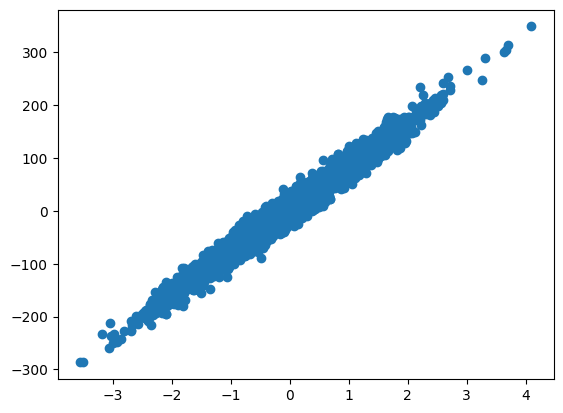

In [5]:
plt.scatter(X,y)

In [6]:
X.shape,y.shape

((3750, 1), (3750, 1))

In [7]:
X = X.values
y = y.values

In [8]:
# Implementing the linear regression algorithm

In [55]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):  ## This calculates our gradient
    m = X.shape[0]
    gradient = np.zeros(2)
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        y = Y[i]
        gradient[0] += (y_ - y)
        gradient[1] += (y_ - y)*X[i]

    return gradient/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_-y[i])**2
    return total_error/m

def gradient_descent(X,Y,learning_rate = 0.1):
    theta = np.zeros(2)
    iteration = 1000
    error_list = []
    theta_list = []
    for i in range(iteration):
        e = error(X,Y,theta)
        error_list.append(e)
        grad = gradient(X,Y,theta)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        theta_list.append((theta[0],theta[1]))

    return theta,error_list,theta_list



    

In [56]:
theta,error_list,theta_list = gradient_descent(X,y)

In [57]:
theta

array([ 3.72798828, 80.54363185])

In [58]:
error_list

[array([6576.35005246]),
 array([5382.10116306]),
 array([4411.49946152]),
 array([3622.60756627]),
 array([2981.36244807]),
 array([2460.09492819]),
 array([2036.32790862]),
 array([1691.80078718]),
 array([1411.67742971]),
 array([1183.90311642]),
 array([998.68240386]),
 array([848.05513558]),
 array([725.55212733]),
 array([625.91553452]),
 array([544.87173451]),
 array([478.94684832]),
 array([425.31688589]),
 array([381.68600791]),
 array([346.18762175]),
 array([317.30402305]),
 array([293.8011006]),
 array([274.67527734]),
 array([259.1103913]),
 array([246.44265199]),
 array([236.13215782]),
 array([227.7397446]),
 array([220.90816592]),
 array([215.34679392]),
 array([210.819181]),
 array([207.13294679]),
 array([204.13155518]),
 array([201.6876277]),
 array([199.69750573]),
 array([198.07682823]),
 array([196.75693483]),
 array([195.6819403]),
 array([194.80635471]),
 array([194.09314753]),
 array([193.51217265]),
 array([193.03888696]),
 array([192.65330781]),
 array([192.3

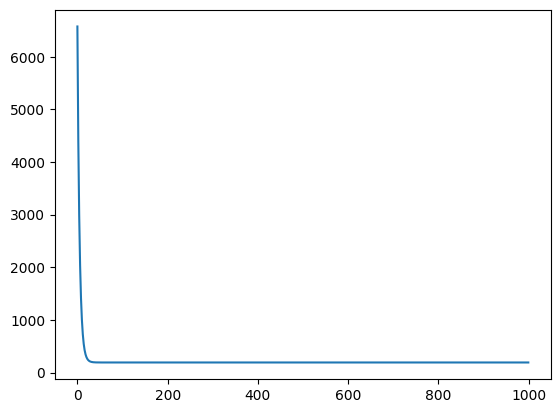

In [59]:
plt.plot(error_list)

## Predictions


In [60]:
y_ = hypothesis(X,theta)

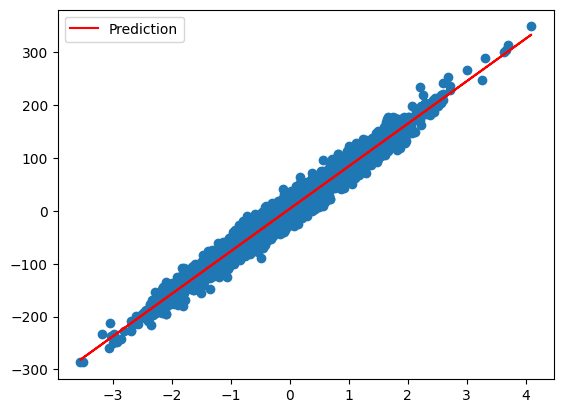

In [61]:
plt.scatter(X,y)
plt.plot(X,y_,color = 'red',label = 'Prediction')
plt.legend()

In [62]:
## Loading the test data

In [63]:
X_test = pd.read_csv('Linear_X_Test.csv').values

In [64]:
y_test = hypothesis(X_test,theta)
y_test

array([[-147.52847525],
       [ -66.26699842],
       [-200.06209345],
       ...,
       [  14.0382031 ],
       [ -18.66616899],
       [ -51.07594693]])

In [65]:
y_test.shape

(1250, 1)

In [66]:
df = pd.DataFrame(data =y_test, columns= ['y'])
df.to_csv("Predictions.csv",index=False)

## Computing Score

In [67]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    den = np.sum((y-y.mean())**2)
    score = (1-(num/den))
    return score*100


In [68]:
r2_score(y,y_)

97.09612233822354

In [69]:
from mpl_toolkits.mplot3d import Axes3D


In [70]:
theta

array([ 3.72798828, 80.54363185])

In [71]:
## Loss Actually 
t0 = np.arange(-40,40)
t1 = np.arange(40,120)

In [72]:
t0

array([-40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28,
       -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15,
       -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,
        -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39])

In [73]:
t0,t1 = np.meshgrid(t0,t1)

In [74]:
j = np.zeros(t0.shape)

In [75]:
j.shape


(80, 80)

In [86]:
for i in range(j.shape[0]):
    for k in range(j.shape[1]):
        y_ = t1[i,k]*X + t0[i,k]
        j[i,k] = np.sum((y-y_)**2)/y.shape[0]
print(j)  # J is the loss      





[[3589.28096951 3505.88965864 3424.49834777 ... 3020.15003249
  3090.75872162 3163.36741075]
 [3513.64821294 3430.18131275 3348.71441255 ... 2938.69689802
  3009.22999782 3081.76309763]
 [3439.98675922 3356.4442697  3274.90178018 ... 2859.21506639
  2929.67257688 3002.13008736]
 ...
 [3533.59085392 3444.37916515 3357.16747638 ... 2516.29081869
  2581.07912992 2647.86744115]
 [3609.74841683 3520.46113874 3433.17386065 ... 2586.62800371
  2651.34072562 2718.05344752]
 [3687.8772826  3598.51441518 3511.15154777 ... 2658.93649158
  2723.57362416 2790.21075674]]


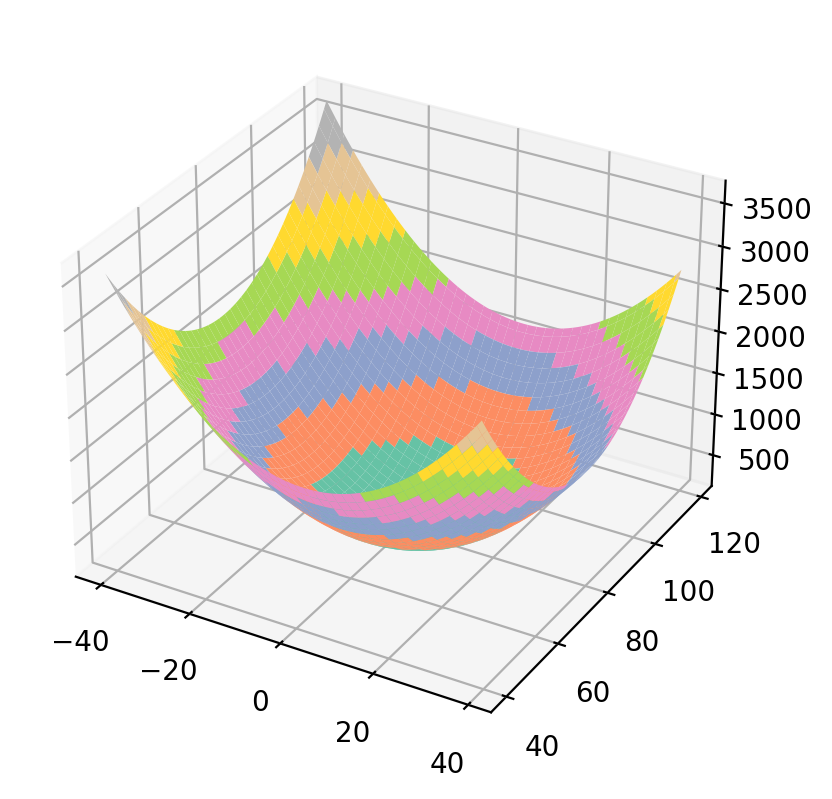

In [88]:
## Lets visualise the loss
fig = plt.figure(dpi = 200)
axes = plt.axes(projection = '3d')
axes.plot_surface(t0,t1,j,cmap = 'Set2')
plt.show()

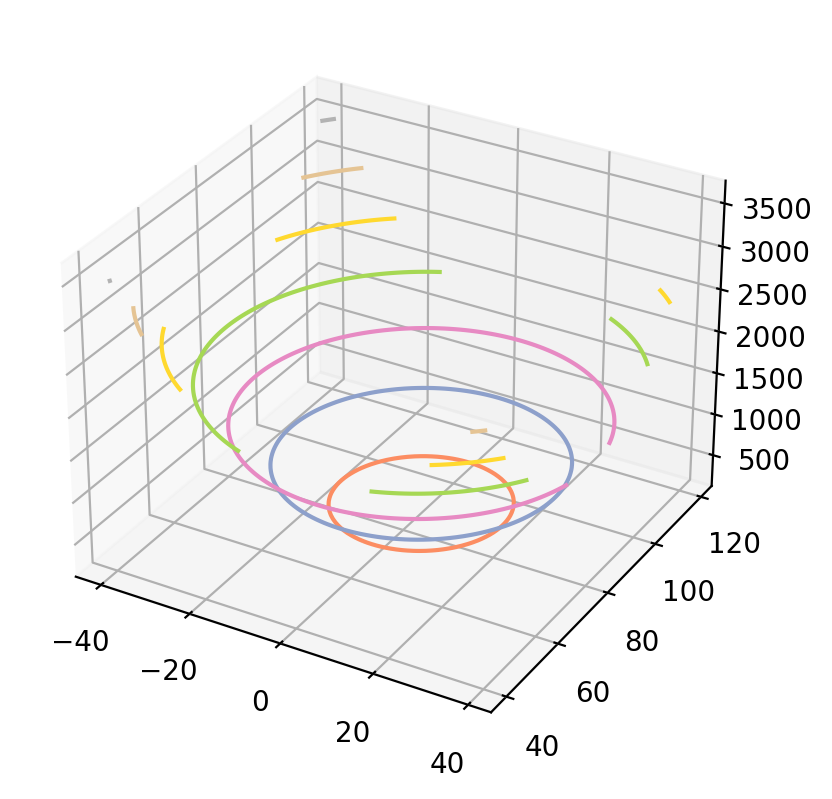

In [89]:
## Lets visualise the loss
fig = plt.figure(dpi = 200)
axes = plt.axes(projection = '3d')
axes.contour(t0,t1,j,cmap = 'Set2') ## This is a contour plot
plt.show()

In [90]:
#Plot the changes in the value of theta
theta_list = np.array(theta_list)

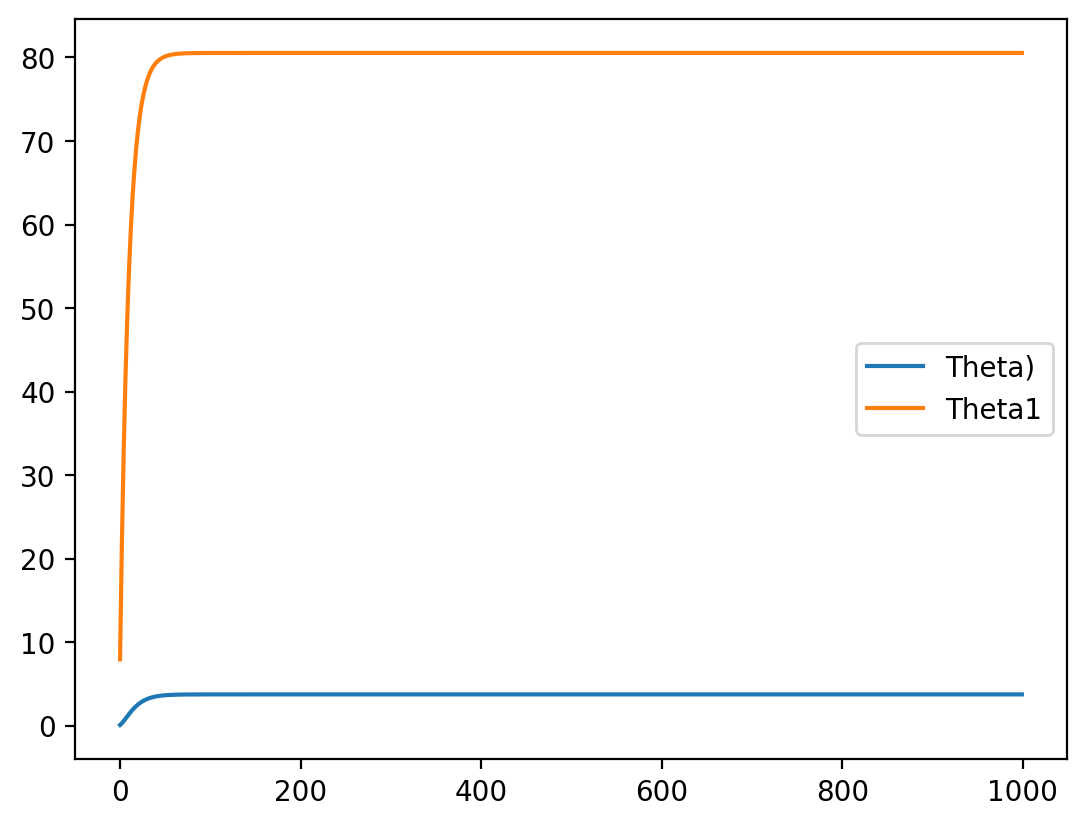

In [91]:
plt.figure(dpi=200)
plt.plot(theta_list[:,0],label = 'Theta)')
plt.plot(theta_list[:,1],label = "Theta1")
plt.legend()



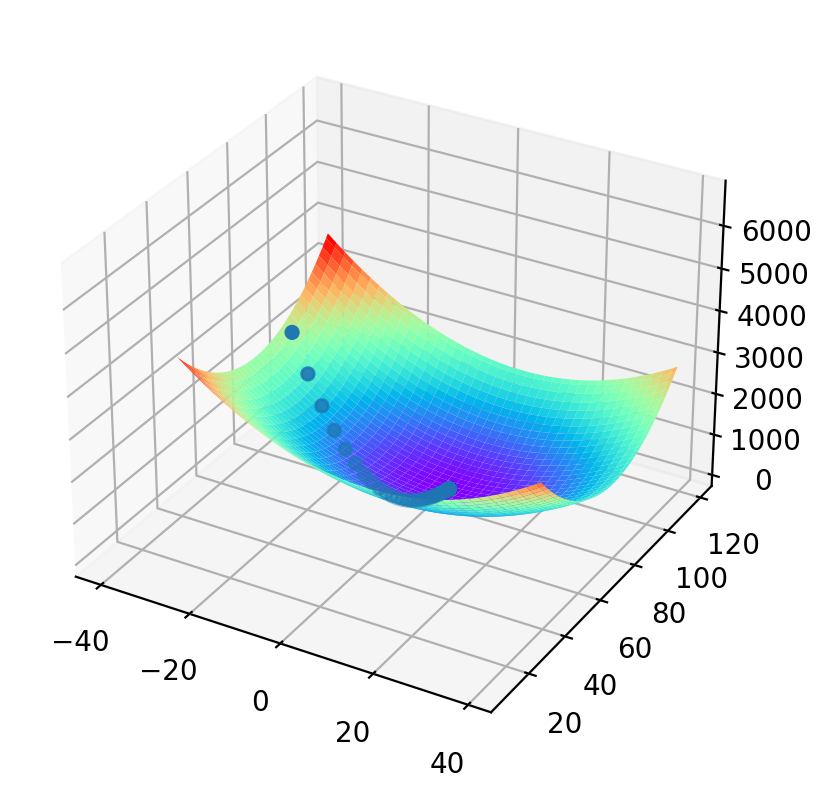

In [93]:
fig = plt.figure(dpi=200)
axes = plt.axes(projection = '3d')
axes.plot_surface(t0,t1,j,cmap = 'rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

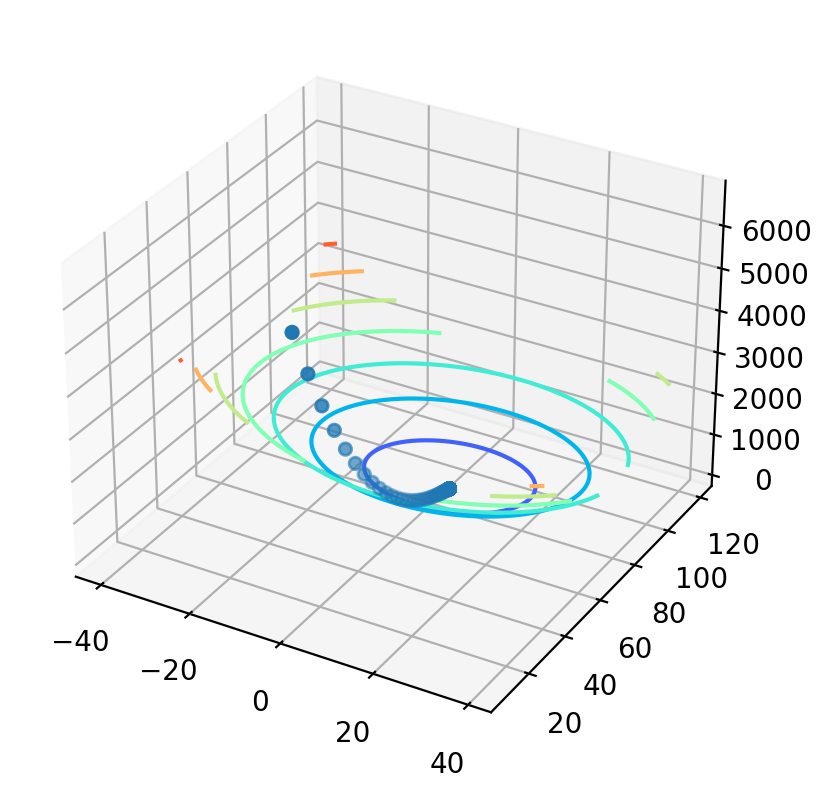

In [95]:
fig = plt.figure(dpi=200)
axes = plt.axes(projection = '3d')
axes.contour(t0,t1,j,cmap = 'rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

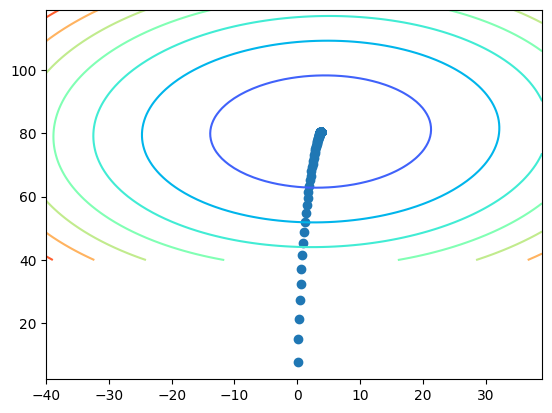

In [96]:
plt.contour(t0,t1,j,cmap = 'rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1])
plt.show()